In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image, name='Lenna'):
    plt.imshow(image)
    plt.title(name)
    plt.show()

In [3]:
def cluster_image(image, color_space=None):
    image_in_color_space = cv2.cvtColor(image, color_space) if color_space else image
    pixel_data = np.float32(image_in_color_space.reshape((-1,3)))

    number_of_clusters = 3
    stop_conds= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90) 
    number_of_attempts = 6

    _, regions, centers  = cv2.kmeans(
        pixel_data,
        number_of_clusters,
        None,
        stop_conds,
        number_of_attempts,
        cv2.KMEANS_RANDOM_CENTERS
    )

    regions = np.uint8(centers)[regions.flatten()]
    return regions.reshape((image.shape))

In [4]:
def plot_clustered_image(original, clustered, color_space_name):
    title = f'Color clustering ({color_space_name})'
    _, axs = plt.subplots(1, 2)
    plt.title(title)
    axs[0].set(title='Original')
    axs[0].imshow(original)
    axs[1].set(title='Clustered')
    axs[1].imshow(clustered)
    plt.savefig(title)
    plt.show()

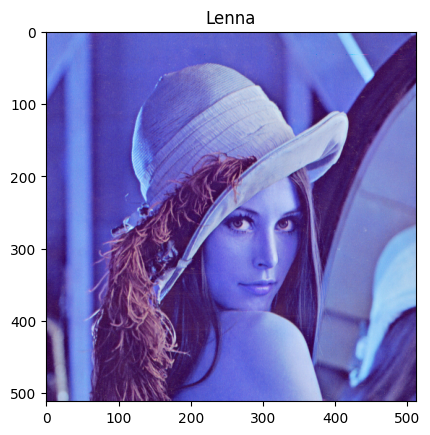

(512, 512, 3)


In [5]:
image = cv2.imread('../images/Lenna.png')
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(image)
print(image.shape)

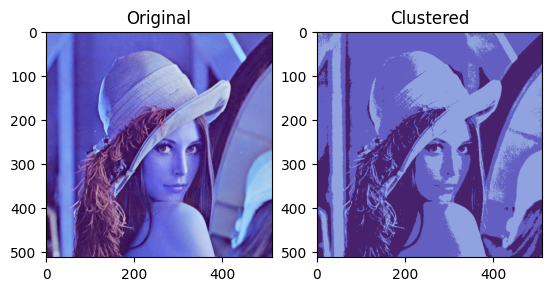

In [6]:
clustered_image = cluster_image(image)
plot_clustered_image(image, clustered_image, 'BGR')

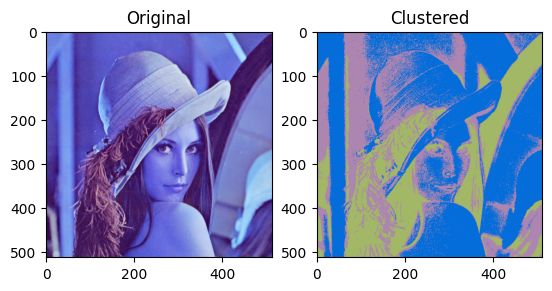

In [7]:
clustered_image = cluster_image(image, cv2.COLOR_BGR2HSV)
plot_clustered_image(image, clustered_image, 'HSV')

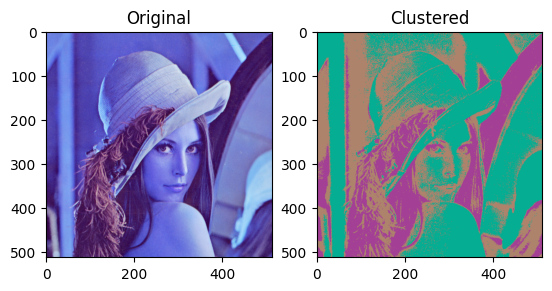

In [8]:
clustered_image = cluster_image(image, cv2.COLOR_BGR2HLS)
plot_clustered_image(image, clustered_image, 'HSL')